#### Data Import

In [378]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [379]:
filepath = r"C:\Users\Nigel\Git\perinatal_epi\Data\LTM.csv"

ltm = pd.read_csv(filepath)
ltm.head()

,LTMID,mode,Q_Language,Q510a,Q520,Q610,Q705,Q715,Q716,Q740,...,char_Q1325a,char_raceeth,char_education,agree1,age,raceeth,yes,education,vaginal,csection
0,70001n,Online - self,English,September,Boy,2,"Yes, I had a choice",5.0,NaN,"No, I did not look",...,1,1,4,Strongly Agree & Agree,25-34 years old,Hispanic/Latina,1,"Some college, but no degree",NaN,NaN
1,70002m,Online - self,English,October,Boy,2,"Yes, I had a choice",3.0,2.0,"No, I did not look",...,1,2,7,Strongly Agree & Agree,25-34 years old,"White, non-Hispanic",1,"Some graduate school, but no degree",NaN,NaN
2,70003n,Online - self,Spanish,November,Girl,4,"Yes, I had a choice",1.0,1.0,"Yes, I looked and found this information",...,1,1,3,Strongly Agree & Agree,25-34 years old,Hispanic/Latina,1,Less than high school - high school,NaN,NaN
3,70006c,Phone - interviewer,English,September,Girl,4,"No, I had no choice; my maternity care provide...",4.0,NaN,"Yes, I looked and found this information",...,5,3,4,All Disagrees,25-34 years old,"Black, non-Hispanic",1,"Some college, but no degree",NaN,NaN
4,70007s,Combination of online and phone,English,November,Boy,4,"Yes, I had a choice",4.0,NaN,"No, I did not look",...,2,1,4,Strongly Agree & Agree,35 and older,Hispanic/Latina,1,"Some college, but no degree",NaN,NaN


In [427]:
len(ltm)

1944

In [426]:
ltm.groupby(['Q1115'])['LTMID'].count() # investigate why we have different counts compared to slide 2

Q1115
C-section     241
Vaginal      1703
Name: LTMID, dtype: int64

#### Figure 1: Demographic characteristics of the participants: the association between those who disagreed to decision-making autonomy and mode of delivery

In [380]:
cols = ['LTMID','age','raceeth', 'education', 'Q1115', 'agree1']

tbl1 = ltm[cols].rename(columns={'age':'Maternal Age','raceeth':'Race/Ethnicity','education':'Education','Q1115':'Mode of Delivery', 'agree1':'Autonomy'}).copy()
tbl1.head()

,LTMID,Maternal Age,Race/Ethnicity,Education,Mode of Delivery,Autonomy
0,70001n,25-34 years old,Hispanic/Latina,"Some college, but no degree",Vaginal,Strongly Agree & Agree
1,70002m,25-34 years old,"White, non-Hispanic","Some graduate school, but no degree",Vaginal,Strongly Agree & Agree
2,70003n,25-34 years old,Hispanic/Latina,Less than high school - high school,Vaginal,Strongly Agree & Agree
3,70006c,25-34 years old,"Black, non-Hispanic","Some college, but no degree",Vaginal,All Disagrees
4,70007s,35 and older,Hispanic/Latina,"Some college, but no degree",Vaginal,Strongly Agree & Agree


In [494]:
tbl1.Education.unique()

array(['Some college, but no degree',
       'Some graduate school, but no degree',
       'Less than high school - high school',
       'Associate degree or College Degree', 'Graduate school'],
      dtype=object)

In [509]:
tbl1['Education'] = tbl1['Education'].replace(
                                        "Some college, but no degree", "Some College").replace(
                                        "Some graduate school, but no degree", "Some Graduate School").replace(
                                        "Less than high school - high school","High School").replace(
                                        "Associate degree or College Degree","College Degree").replace(
                                        "Graduate school","Graduate School"
                                        )

In [510]:
tbl1.Education.unique()

array(['Some College', 'Some Graduate School', 'High School',
       'College Degree', 'Graduate School'], dtype=object)

In [480]:
tbl1['Maternal Age'].unique()

array(['25-34 years old', '35 and older', 'Less than 25 years old'],
      dtype=object)

In [483]:
tbl1['Maternal Age'] = tbl1['Maternal Age'].replace('25-34 years old','25-34').replace('Less than 25 years old','Less than 25').replace('35 and older','35+')

In [484]:
tbl1['Maternal Age'].unique()

array(['25-34', '35+', 'Less than 25'], dtype=object)

In [49]:
# check to make sure each ID is unique (equal to the number of observations)
try: 
    assert len(tbl1) == tbl1['LTMID'].nunique()
    print('No duplicate IDs found')
except:
    print('Duplicate IDs present.')

No duplicate IDs found


In [428]:
len(tbl1)

1944

In [43]:
#tbl1 = tbl1.groupby(['Maternal Age', 'Race/Ethnicity', 'Education', 'Mode of Delivery', 'Autonomy'])['LTMID'].count().reset_index().rename(columns={'LTMID':'count'})
#tbl12

In [485]:
# check the counts for the first subplot
viz1 = tbl1.groupby(['Maternal Age','Autonomy'])['LTMID'].count().reset_index().rename(columns={'LTMID':'count'})
viz1.head()

,Maternal Age,Autonomy,count
0,25-34,All Disagrees,255
1,25-34,Strongly Agree & Agree,857
2,35+,All Disagrees,79
3,35+,Strongly Agree & Agree,292
4,Less than 25,All Disagrees,133


In [486]:
viz1['count'].sum() == tbl1['LTMID'].count()

True

In [487]:
# check the counts for the second subplot
viz1 = tbl1.groupby(['Autonomy','Race/Ethnicity'])['LTMID'].count().reset_index().rename(columns={'LTMID':'count'})
viz1.head()

,Autonomy,Race/Ethnicity,count
0,All Disagrees,"Black, non-Hispanic",50
1,All Disagrees,Hispanic/Latina,240
2,All Disagrees,Other,75
3,All Disagrees,"White, non-Hispanic",98
4,Strongly Agree & Agree,"Black, non-Hispanic",111


In [488]:
viz1['count'].sum() == tbl1['LTMID'].count()

False

In [489]:
tbl1['Race/Ethnicity'].isnull().sum()

22

In [490]:
# check the counts for the third subplot
viz1 = tbl1.groupby(['Autonomy','Education'])['LTMID'].count().reset_index().rename(columns={'LTMID':'count'})
viz1.head()

,Autonomy,Education,count
0,All Disagrees,Associate degree or College Degree,110
1,All Disagrees,Graduate school,59
2,All Disagrees,Less than high school - high school,153
3,All Disagrees,"Some college, but no degree",138
4,All Disagrees,"Some graduate school, but no degree",7


In [441]:
viz1['count'].sum() == tbl1['LTMID'].count()

True

In [492]:
# check the counts for the fourth subplot
viz1 = tbl1.groupby(['Autonomy','Education'])['LTMID'].count().reset_index().rename(columns={'LTMID':'count'})
viz1.head()

,Autonomy,Education,count
0,All Disagrees,Associate degree or College Degree,110
1,All Disagrees,Graduate school,59
2,All Disagrees,Less than high school - high school,153
3,All Disagrees,"Some college, but no degree",138
4,All Disagrees,"Some graduate school, but no degree",7


In [493]:
tbl1['Education'].unique()

array(['Some college, but no degree',
       'Some graduate school, but no degree',
       'Less than high school - high school',
       'Associate degree or College Degree', 'Graduate school'],
      dtype=object)

In [444]:
viz1['count'].sum() == tbl1['LTMID'].count()

True

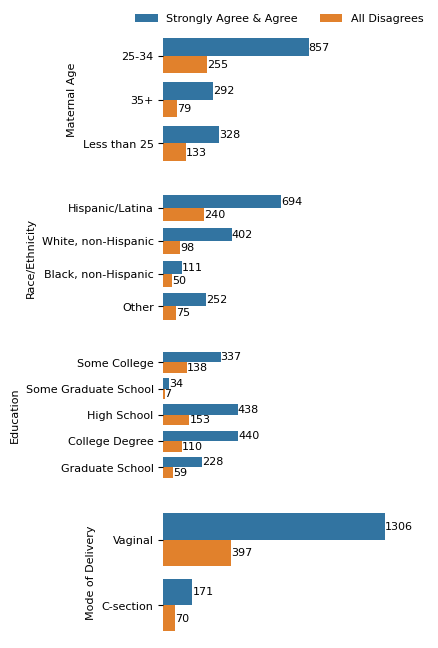

In [511]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(3,8), sharex=True, dpi=100)

# create the subplots
ax = sns.countplot(data=tbl1, y='Maternal Age', hue='Autonomy', ax=ax1)
for container in ax.containers:
    ax.bar_label(container)

ax = sns.countplot(data=tbl1, y='Race/Ethnicity', hue='Autonomy', ax=ax2)
for container in ax.containers:
    ax.bar_label(container)

ax = sns.countplot(data=tbl1, y='Education', hue='Autonomy', ax=ax3)
for container in ax.containers:
    ax.bar_label(container)

ax = sns.countplot(data=tbl1, y='Mode of Delivery', hue='Autonomy', ax=ax4)
for container in ax.containers:
    ax.bar_label(container)

plt.rc('font', size=8)          # controls default text sizes
plt.rc('axes', titlesize=10)     # fontsize of the axes title

sns.move_legend(
    ax1, "lower center",
    bbox_to_anchor=(.5, 1), ncol=3, frameon=False, title=None
)

ax1.set(xlabel=None)
ax1.tick_params(bottom=False)  # remove the ticks
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2.set(xlabel=None)
ax2.tick_params(bottom=False)  # remove the ticks
ax2.legend_.remove()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

ax3.set(xlabel=None)
ax3.tick_params(bottom=False)  # remove the ticks
ax3.legend_.remove()
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['left'].set_visible(False)

ax4.set(xlabel=None)
ax4.set(xticklabels=[])  
ax4.tick_params(bottom=False)  # remove the ticks
ax4.legend_.remove()
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['left'].set_visible(False)

#plt.suptitle("""
#Demographic characteristics of the participants:
#The association between those who disagreed to decision-making autonomy and mode of delivery,
#Listening to Mothers in California (LTM-CA), 2017 (n=1477)"""
#, wrap=True)
plt.show()

#### Figure 2. Unadjusted Odds Ratios (OR) and 95% Confidence Interval (CI) of the association between autonomy and unplanned cesareans

In [237]:
import forestplot as fp

In [313]:
filepath = r"C:\Users\Nigel\Git\perinatal_epi\Data\adjusted_odds_ratios.csv"

df = pd.read_csv(filepath)
df

,or,p-val,ll,hl,moerror,group,label
0,1.318,0.0885,0.959,1.810,0.1619,"Perceived Autonomy (ref = ""Agrees"")",All Disagrees
1,2.099,0.0024,1.300,3.390,0.2442,"Race/Ethnicity (ref = White, non-Hispanic)","Black, non-Hispanic"
2,0.973,0.8855,0.667,1.418,0.1923,"Race/Ethnicity (ref = White, non-Hispanic)",Hispanic/Latina
3,1.030,0.8954,0.666,1.593,0.2225,"Race/Ethnicity (ref = White, non-Hispanic)",Other
4,1.241,0.2833,0.837,1.839,0.2008,Age (ref = Less than 25 years old),25-34
5,1.105,0.6924,0.674,1.811,0.2519,Age (ref = Less than 25 years old),35 and older
6,1.456,1.4560,0.948,2.239,0.2192,Education (ref = Less than High School - High ...,Associate degree or College Degree
7,1.679,0.0864,0.999,2.824,0.2651,Education (ref = Less than High School - High ...,Graduate school
8,1.328,0.0506,0.886,1.989,0.2061,Education (ref = Less than High School - High ...,"Some college, but no degree"
9,1.357,0.1689,0.485,3.797,0.5246,Education (ref = Less than High School - High ...,"Some graduate school, but no degree"


<AxesSubplot:xlabel='Adjusted Odds Ratios'>

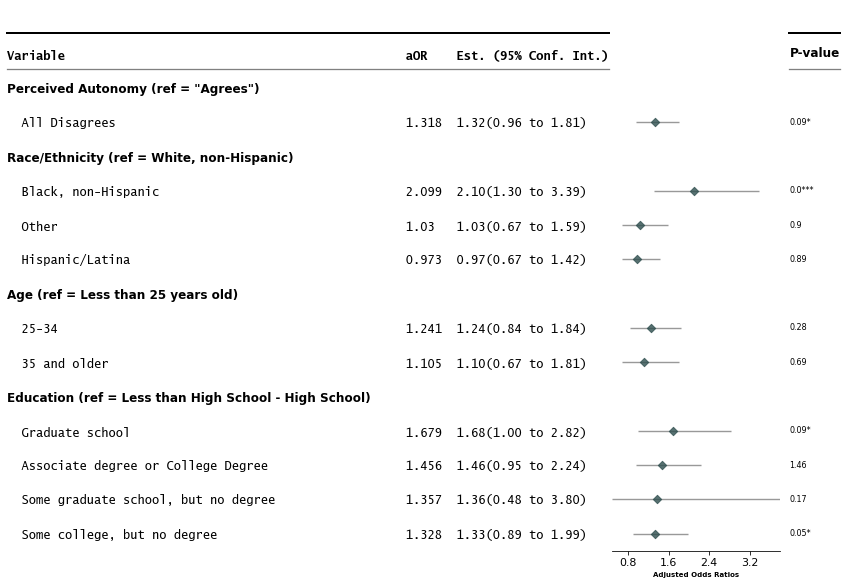

In [377]:
fp.forestplot(df,  # the dataframe with results data  
              estimate="or",  # col containing estimated effect size
              ll="ll", hl="hl",  # lower & higher limits of conf. int.
              moerror="moerror",  # columns containing conf. int. margin of error
              varlabel="label",  # column containing variable label
              #capitalize="capitalize",  # Capitalize labels
              groupvar="group",  # Add variable grouping
              pval="p-val",  # Column of p-value to be reported on right
              group_order=['Perceived Autonomy (ref = "Agrees")', "Race/Ethnicity (ref = White, non-Hispanic)",
                        "Age (ref = Less than 25 years old)", 'Education (ref = Less than High School - High School)'],
              sort=True,  # sort in ascending order (sorts within group if group is specified)
              annote=["or", "est_ci"],  # columns to report on left of plot
              annoteheaders=["aOR", "Est. (95% Conf. Int.)"],  # ^corresponding headers
              table=True,
              xlabel="Adjusted Odds Ratios",  # x-label title
              # Additional kwargs for customizations
              **{"marker": "D",  # set maker symbol as diamond
                 "markersize": 35,  # adjust marker size
                 "xtick_size": 11,  # adjust x-ticker fontsize
                 "xlabel_size":7,
                 "fontsize":12
                },
              flush=True,
              color_alt_rows=False,
              figsize=(3,10)    
              )

#### Figure 3. Unplanned Cesareans by Reason

In [387]:
fig3 = ltm[['LTMID','raceeth','Q1255','Q1115']]
fig3 = fig3[fig3['Q1115']!='Vaginal']
fig3.head(20)

,LTMID,raceeth,Q1255,Q1115
37,70079h,"Black, non-Hispanic",I or my baby had a health problem that require...,C-section
41,70099s,Other,My maternity care provider tried to start (ind...,C-section
46,70111r,"Black, non-Hispanic",Some other reason. Please tell us:,C-section
56,70139z,"Black, non-Hispanic",I or my baby had a health problem that require...,C-section
58,70142c,"Black, non-Hispanic",Some other reason. Please tell us:,C-section
59,70149x,"Black, non-Hispanic",My maternity care provider tried to start (ind...,C-section
65,70163r,"Black, non-Hispanic",Some other reason. Please tell us:,C-section
69,70170r,"Black, non-Hispanic",NaN,C-section
78,70200q,"Black, non-Hispanic",NaN,C-section
89,70232x,"Black, non-Hispanic",Some other reason. Please tell us:,C-section


In [392]:
fig3 = fig3.groupby(['raceeth','Q1255'])['LTMID'].count().reset_index()
fig3.head()

,raceeth,Q1255,LTMID
0,"Black, non-Hispanic",I or my baby had a health problem that require...,15
1,"Black, non-Hispanic",My maternity care provider tried to start (ind...,7
2,"Black, non-Hispanic",My maternity care provider was worried that th...,2
3,"Black, non-Hispanic",Some other reason. Please tell us:,10
4,Hispanic/Latina,For a non-medical reason – it did not offer a ...,1


In [424]:
fig3.LTMID.sum()

212

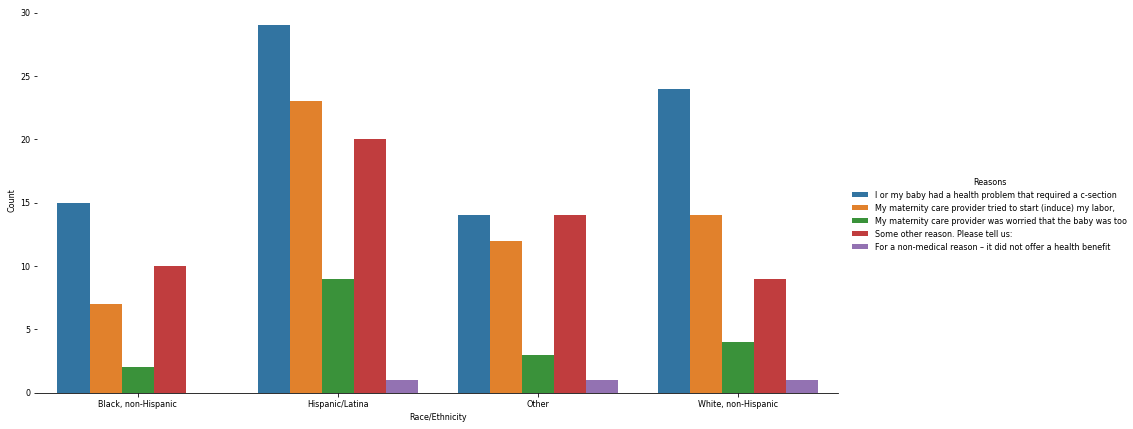

In [423]:

g = sns.catplot(
    data=fig3, kind="bar",
    x="raceeth", y="LTMID", hue="Q1255",
    #errorbar="sd",
    #palette="dark",
    #alpha=.6,
    height=6,
    legend_out=True,
    aspect=20/10
)
g.despine(left=True)
g.set_axis_labels("Race/Ethnicity", "Count")
g.legend.set_title("Reasons")


In [472]:
ltm[ltm['Q1255_TEXT'].notnull()]['Q1255_TEXT']

46      Baby pooped in sac. was told it was dangerous ...
58                      My babies heart rate was dropping
65                                         She got stuck.
89      I was told my baby could have brain damage if ...
90      BECAUSE MY EPIDURAL DIDNT WORK AND BECASUE THE...
91                       my son's heartrate was dropping.
163                     because babys heart rate dropping
165                    he was too long and I couldnt push
173                                Got stuck stuck at 8cm
335     My baby was so big he would not engage into th...
337              Heart distress on baby Emergency cesarea
396     it wa sthe physician's choice just me not open...
404     Stopped dilating due to cord being around his ...
433     Baby was face up and stuck. Would not come dow...
434     Baby was posterior and could not pass though a...
468     She was facing the wrong way and the epidural ...
581                I had high blood pressure and a fever.
592     I star

In [473]:
ltm[ltm['Q1260_TEXT'].notnull()]['Q1260_TEXT']

78      10+Pain in left side of abdomen, (about to rup...
153                                    my baby was breech
748                     Baby flipped breech during labor.
1149    After 28 hours of labor on pitocin, i dilated ...
1374    The chances were too low of having a vaginal b...
1500                                  Failure to progress
1587    because in one clinic they told me that I coul...
1910                                   I wasn't dialating
1920    I was not dilating enough and I already had fr...
Name: Q1260_TEXT, dtype: object